#  ML 2 Project: GMM with Statistical models

Team members,
Musab - 29409
Hussain - 29410

In [178]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.stats import boxcox
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [179]:
# Load datasets
data1 = pd.read_csv('turkiye-student-evaluation_generic.csv')
data2 = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')

In [180]:
data2_subset = data2.sample(frac=0.1, random_state=42)

In [181]:
# Display summary statistics
print(data1.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [182]:
def preprocess_data(data):
    # Initialize LabelEncoder
    le = LabelEncoder()

    # Encode categorical columns
    for col in data.select_dtypes(include=['object', 'category']).columns:
        data[col] = le.fit_transform(data[col])

    # Standardize features
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    return data_scaled

In [183]:
data1_scaled = preprocess_data(data1)
data2_scaled = preprocess_data(data2_subset)

In [184]:
# Apply GMM
gmm1 = GaussianMixture(n_components=2, random_state=33) # tried 2, 3, 7 and 9 (9 gave best Silhouette score of 0.1)
labels1 = gmm1.fit_predict(data1_scaled)
sil_score1 = silhouette_score(data1_scaled, labels1)

In [185]:
gmm2 = GaussianMixture(n_components=2, random_state=33)
labels2 = gmm2.fit_predict(data2_scaled)
sil_score2 = silhouette_score(data2_scaled, labels2)

In [186]:
print(f'Silhouette Score Dataset 1 (Original): {sil_score1}')
print(f'Silhouette Score Dataset 2 (Original): {sil_score2}')

Silhouette Score Dataset 1 (Original): 0.018240811304036857
Silhouette Score Dataset 2 (Original): 0.22548461297141031


## Statistical Transformation

In [187]:
def apply_log(data):
    transformed_data = data.copy()

    # Select numeric columns only
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        # Ensure all values are positive
        if (data[col] <= 0).any():
            transformed_data[col] = data[col] + 1e-6  # Add small constant to avoid log(0)

        # Apply log transformation
        transformed_data[col] = np.log(transformed_data[col])

    return transformed_data

In [188]:
# Apply Box-Cox transformation (requires positive values)
data1_transformed = apply_log(data1)
data2_transformed = apply_log(data2_subset)

In [189]:
# Re-standardize
scaler = StandardScaler()
data1_transformed_scaled = scaler.fit_transform(data1_transformed)
data2_transformed_scaled = scaler.fit_transform(data2_transformed)

In [190]:
gmm1_trans = GaussianMixture(n_components=2, random_state=33)
labels1_trans = gmm1_trans.fit_predict(data1_transformed_scaled)
sil_score1_trans = silhouette_score(data1_transformed_scaled, labels1_trans)

In [191]:
gmm2_trans = GaussianMixture(n_components=2, random_state=33)
labels2_trans = gmm2_trans.fit_predict(data2_transformed_scaled)
sil_score2_trans = silhouette_score(data2_transformed_scaled, labels2_trans)

In [192]:
print(f'Silhouette Score Dataset 1 (Transformed): {sil_score1_trans}')
print(f'Silhouette Score Dataset 2 (Transformed): {sil_score2_trans}')

Silhouette Score Dataset 1 (Transformed): 0.016794987113468
Silhouette Score Dataset 2 (Transformed): 0.27815504842905925


In [193]:
# Visualize clusters
pca = PCA(n_components=2)
reduced_data1 = pca.fit_transform(data1_scaled)
reduced_data1_trans = pca.fit_transform(data1_transformed_scaled)

Text(0.5, 1.0, 'Original Data')

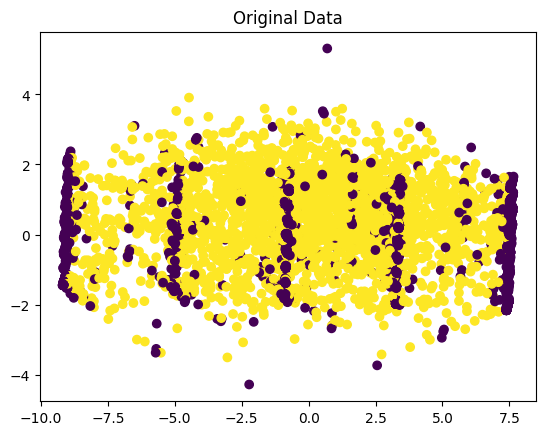

In [194]:
plt.scatter(reduced_data1[:, 0], reduced_data1[:, 1], c=labels1, cmap='viridis', label='Original')
plt.title("Original Data")

Text(0.5, 1.0, 'Transformed Data')

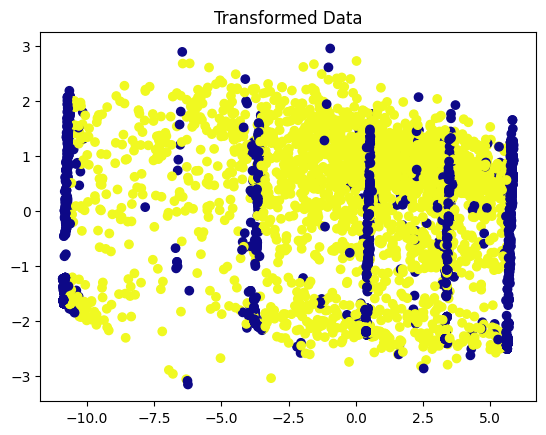

In [195]:
plt.scatter(reduced_data1_trans[:, 0], reduced_data1_trans[:, 1], c=labels1_trans, cmap='plasma', label='Transformed')
plt.title("Transformed Data")

In [196]:
# Visualize clusters
pca = PCA(n_components=2)
reduced_data2 = pca.fit_transform(data2_scaled)
reduced_data2_trans = pca.fit_transform(data2_transformed_scaled)

Text(0.5, 1.0, 'Original Data')

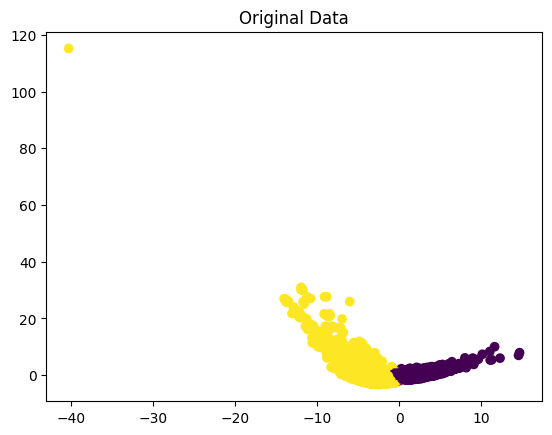

In [197]:
plt.scatter(reduced_data2[:, 0], reduced_data2[:, 1], c=labels2, cmap='viridis', label='Original')
plt.title("Original Data")

Text(0.5, 1.0, 'Transformed Data')

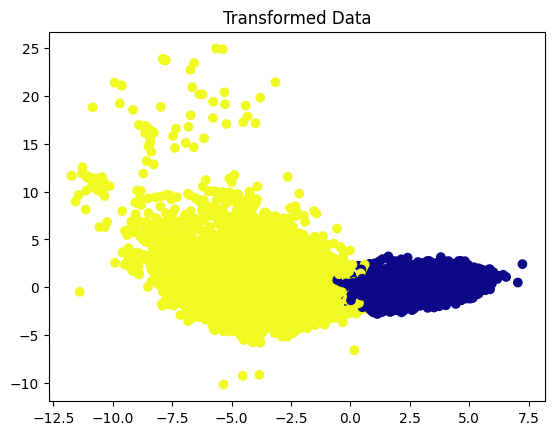

In [198]:
plt.scatter(reduced_data2_trans[:, 0], reduced_data2_trans[:, 1], c=labels2_trans, cmap='plasma', label='Transformed')
plt.title("Transformed Data")

## Radar Plots

In [199]:
data1.columns

Index(['instr', 'class', 'nb.repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28'],
      dtype='object')

In [200]:
labels1

array([0, 0, 0, ..., 0, 0, 0])

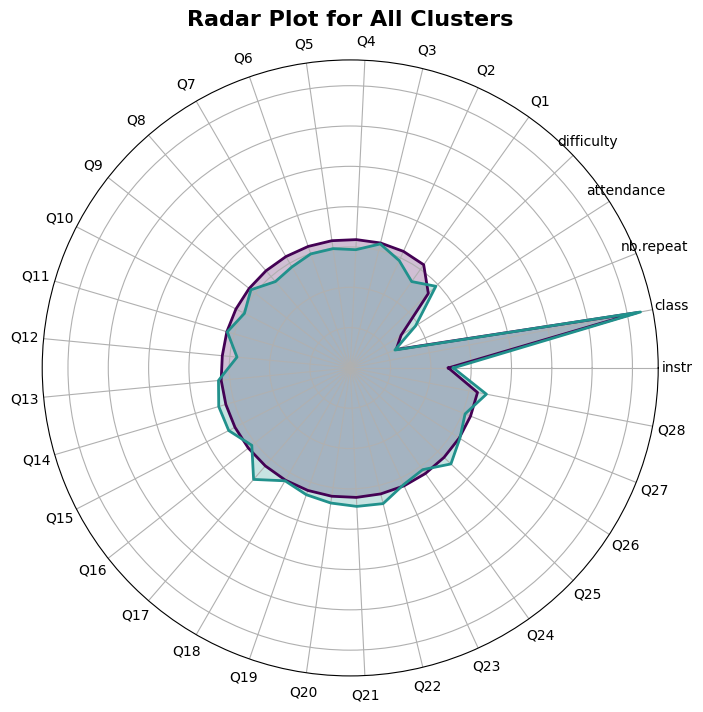

In [201]:
# Select the columns with the features you want to include in the radar plot
features = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']  # Adjust this based on your features
features = data1.columns

# Group by the cluster labels and calculate the mean for each feature
cluster_means = data1[features].groupby(labels1).mean()

# Radar plot function
def create_radar_chart(labels, values, title, color, ax):
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the circle by repeating the first value at the end
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]  # Close the circle

    # Plot the radar chart
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2)

# Create a single figure with one axis for all clusters
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the title
ax.set_title('Radar Plot for All Clusters', size=16, fontweight='bold')

# Create radar charts for each cluster
for i, cluster in enumerate(cluster_means.index):
    color = plt.cm.viridis(i / len(cluster_means.index))  # Use a different color for each cluster
    create_radar_chart(features, cluster_means.loc[cluster].values, f"Cluster {cluster}", color, ax)

# Add labels and show the plot
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, 2 * np.pi, len(features), endpoint=False))
ax.set_xticklabels(features, fontsize=10)

plt.show()

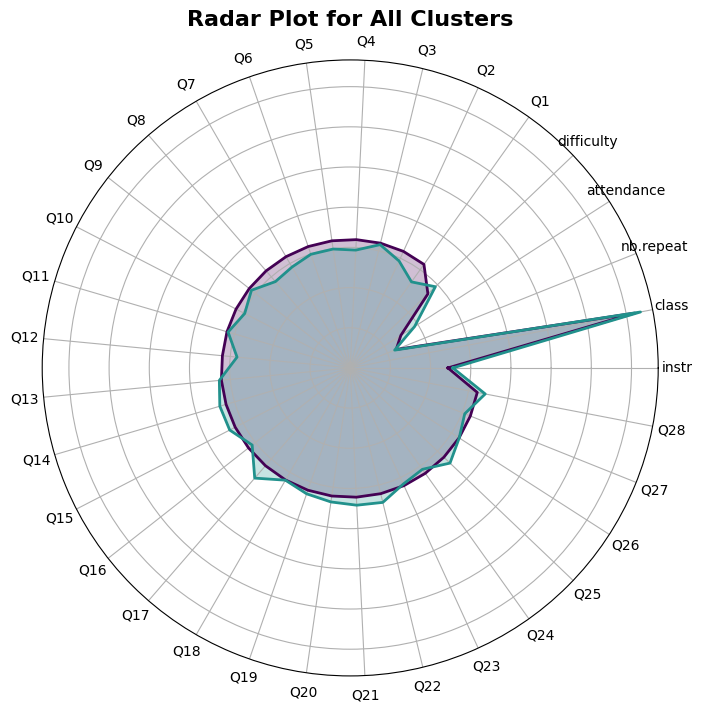

In [202]:
features = data1.columns

# Group by the cluster labels and calculate the mean for each feature
cluster_means = data1[features].groupby(labels1_trans).mean()

# Radar plot function
def create_radar_chart(labels, values, title, color, ax):
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the circle by repeating the first value at the end
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]  # Close the circle

    # Plot the radar chart
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2)

# Create a single figure with one axis for all clusters
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the title
ax.set_title('Radar Plot for All Clusters', size=16, fontweight='bold')

# Create radar charts for each cluster
for i, cluster in enumerate(cluster_means.index):
    color = plt.cm.viridis(i / len(cluster_means.index))  # Use a different color for each cluster
    create_radar_chart(features, cluster_means.loc[cluster].values, f"Cluster {cluster}", color, ax)

# Add labels and show the plot
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, 2 * np.pi, len(features), endpoint=False))
ax.set_xticklabels(features, fontsize=10)

plt.show()

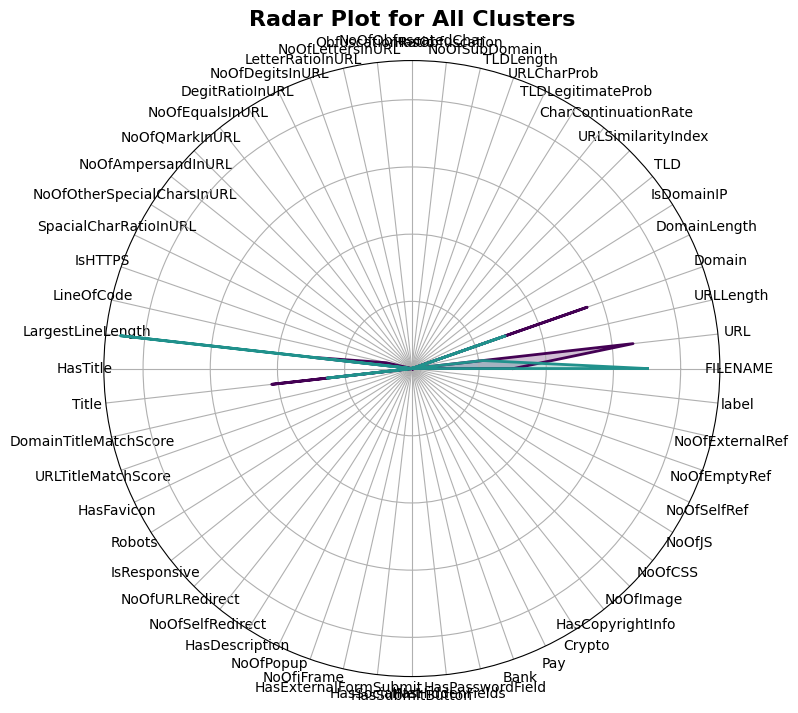

In [203]:
# Select the columns with the features you want to include in the radar plot
features = data2_subset.columns

# Group by the cluster labels and calculate the mean for each feature
cluster_means = data2_subset[features].groupby(labels2).mean()

# Radar plot function
def create_radar_chart(labels, values, title, color, ax):
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the circle by repeating the first value at the end
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]  # Close the circle

    # Plot the radar chart
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2)

# Create a single figure with one axis for all clusters
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the title
ax.set_title('Radar Plot for All Clusters', size=16, fontweight='bold')

# Create radar charts for each cluster
for i, cluster in enumerate(cluster_means.index):
    color = plt.cm.viridis(i / len(cluster_means.index))  # Use a different color for each cluster
    create_radar_chart(features, cluster_means.loc[cluster].values, f"Cluster {cluster}", color, ax)

# Add labels and show the plot
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, 2 * np.pi, len(features), endpoint=False))
ax.set_xticklabels(features, fontsize=10)

plt.show()

In [204]:
exclude_columns = ['FILENAME', 'URL', 'Domain', 'label']

# Create the 'features' list by excluding the unwanted columns
features = [col for col in data2.columns if col not in exclude_columns]

In [205]:
features = data2_subset.columns

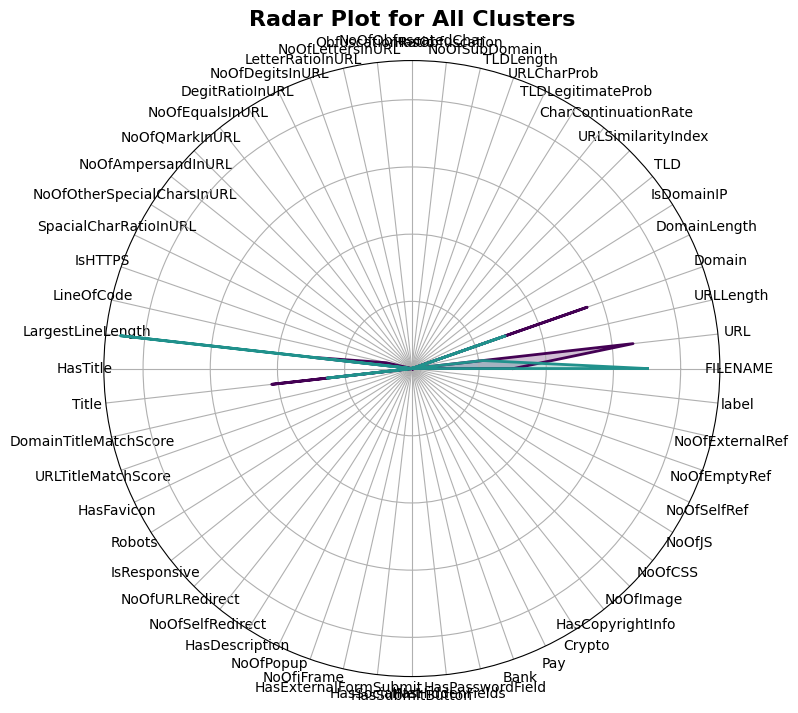

In [206]:
# Group by the cluster labels and calculate the mean for each feature
cluster_means = data2_subset[features].groupby(labels2).mean()

# Radar plot function
def create_radar_chart(labels, values, title, color, ax):
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the circle by repeating the first value at the end
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]  # Close the circle

    # Plot the radar chart
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2)

# Create a single figure with one axis for all clusters
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the title
ax.set_title('Radar Plot for All Clusters', size=16, fontweight='bold')

# Create radar charts for each cluster
for i, cluster in enumerate(cluster_means.index):
    color = plt.cm.viridis(i / len(cluster_means.index))  # Use a different color for each cluster
    create_radar_chart(features, cluster_means.loc[cluster].values, f"Cluster {cluster}", color, ax)

# Add labels and show the plot
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, 2 * np.pi, len(features), endpoint=False))
ax.set_xticklabels(features, fontsize=10)

plt.show()

# Cleaning Data and running again

In [207]:
data1.head(50)

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,2,1,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
6,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,1,2,1,1,3,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
8,1,2,1,1,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
9,1,2,1,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [208]:
data2_subset.head(5)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
136221,17556,18387,24,16084,17,0,318,100.000000,0.800000,0.000510,...,0,0,1,47,3,4,69,7,115,1
56609,22730,9393,59,4603,28,0,94,33.522664,1.000000,0.522907,...,1,0,1,0,2,0,0,0,1,0
46393,16305,6849,385,1967,27,0,315,3.199329,0.458333,0.000046,...,0,0,0,0,0,0,0,0,1,0
129746,17146,1166,19,4635,6,0,323,53.846154,1.000000,0.000896,...,0,0,0,0,0,0,1,0,1,0
131464,7714,23141,35,22090,28,0,45,100.000000,0.857143,0.010086,...,1,0,1,33,7,8,15,0,2,1


In [209]:
import seaborn as sns

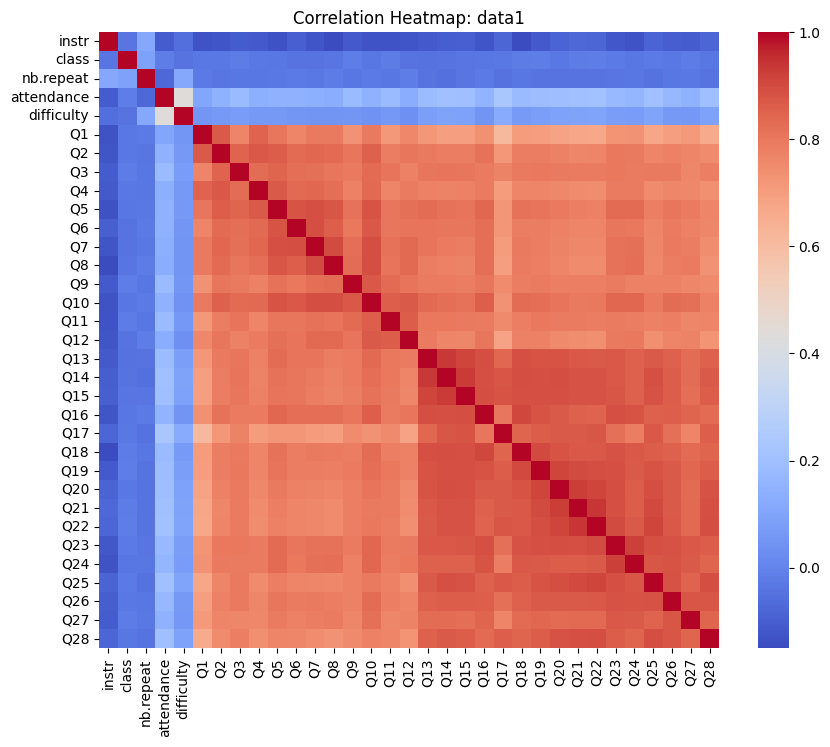

In [210]:
plt.figure(figsize=(10, 8))
sns.heatmap(data1.corr(), cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap: data1")
plt.show()

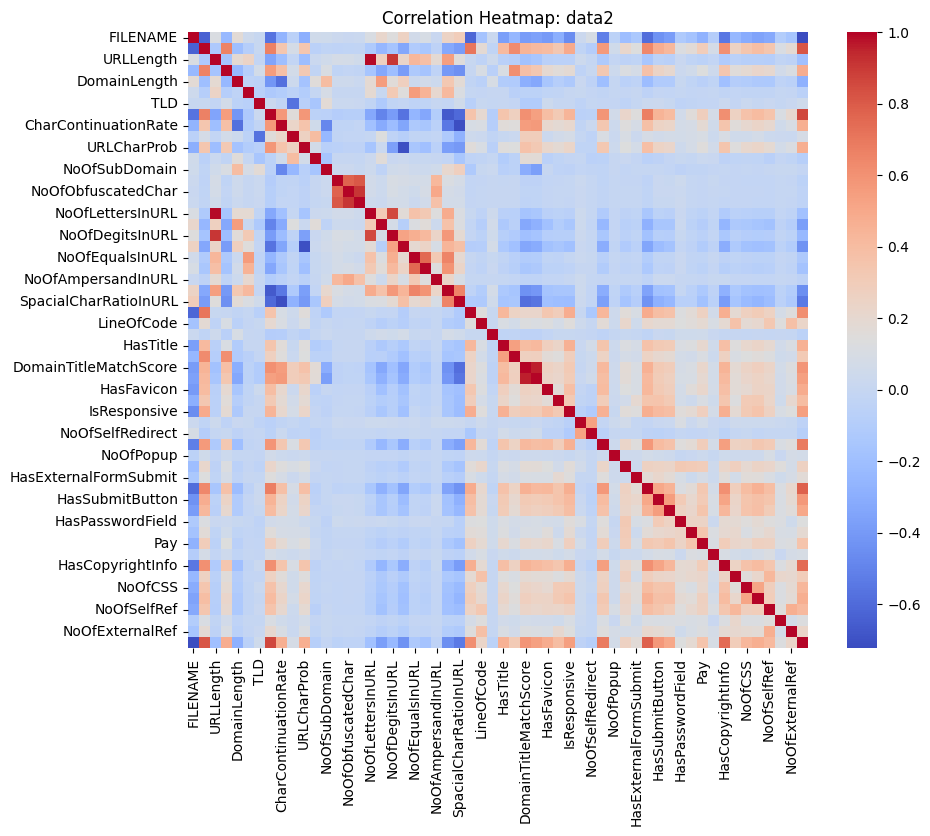

In [211]:
plt.figure(figsize=(10, 8))
sns.heatmap(data2_subset.corr(), cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap: data2")
plt.show()

In [212]:
data1 = data1.drop(columns=['instr', 'class'])

In [213]:
# Calculate correlation matrix
correlation_matrix = data2_subset.corr()

# Define the label column (replace 'label' with your actual label column name)
label_column = 'label'

# Get correlation of all features with the label column
correlation_with_label = correlation_matrix[label_column]

# Set a threshold for correlation (e.g., 0.5, you can adjust this)
threshold = 0.5

# Get the features with correlation above the threshold (both positive and negative correlations)
high_corr_features = correlation_with_label[abs(correlation_with_label) > threshold].index.tolist()

# Identify the features to remove (those with low correlation)
removed_features = [col for col in data2_subset.columns if col not in high_corr_features]

# Print the columns that were removed
print("Removed columns:", removed_features)

# Keep only the label and the features with high correlation
data2_subset = data2_subset[high_corr_features]

# If you want to verify the columns kept, you can print them
print("Columns kept:", data2_subset.columns)


Removed columns: ['URLLength', 'Domain', 'DomainLength', 'IsDomainIP', 'TLD', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title', 'HasFavicon', 'Robots', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
Columns kept: Index(['FILENAME', 'URL', 'URLSimilarityIndex', 'SpacialCharRatioInURL',
       'IsHTTPS', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'IsResponsive', 'HasDescription', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasCopyrightInfo', 'label'],
      dtype='object')

In [214]:
data2_subset = data2_subset.drop(columns=['FILENAME'])

## Preprocess and apply GMM

In [254]:
def preprocess_data(data):
    # Initialize LabelEncoder
    le = LabelEncoder()

    # Encode categorical columns
    for col in data.select_dtypes(include=['object', 'category']).columns:
        data[col] = le.fit_transform(data[col])

    # Standardize features
    # scaler = StandardScaler()
    # data_scaled = scaler.fit_transform(data)

    return data

In [255]:
data1_scaled = preprocess_data(data1)
data2_scaled = preprocess_data(data2_subset)

In [256]:
# Apply GMM
gmm1 = GaussianMixture(n_components=2, random_state=33)
labels1 = gmm1.fit_predict(data1_scaled)
sil_score1 = silhouette_score(data1_scaled, labels1)

In [257]:
gmm2 = GaussianMixture(n_components=2, random_state=33)
labels2 = gmm2.fit_predict(data2_scaled)
sil_score2 = silhouette_score(data2_scaled, labels2)

In [258]:
print(f'Silhouette Score Dataset 1 (Original): {sil_score1}')
print(f'Silhouette Score Dataset 2 (Original): {sil_score2}')

Silhouette Score Dataset 1 (Original): 0.026898372427137128
Silhouette Score Dataset 2 (Original): 0.5757957129462296


## Statistical Transformation

In [220]:
def apply_log(data):
    transformed_data = data.copy()

    # Select numeric columns only
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        # Ensure all values are positive
        if (data[col] <= 0).any():
            transformed_data[col] = data[col] + 1e-6  # Add small constant to avoid log(0)

        # Apply log transformation
        transformed_data[col] = np.log(transformed_data[col])

    return transformed_data

In [221]:
# Apply Box-Cox transformation (requires positive values)
data1_transformed = apply_log(data1)
data2_transformed = apply_log(data2_subset)

In [222]:
# Re-standardize
#scaler = StandardScaler()
#data1_transformed_scaled = scaler.fit_transform(data1_transformed)
#data2_transformed_scaled = scaler.fit_transform(data2_transformed)

In [223]:
gmm1_trans = GaussianMixture(n_components=2, random_state=33)
labels1_trans = gmm1_trans.fit_predict(data1_transformed)
sil_score1_trans = silhouette_score(data1_transformed, labels1_trans)

In [224]:
gmm2_trans = GaussianMixture(n_components=2, random_state=33)
labels2_trans = gmm2_trans.fit_predict(data2_transformed)
sil_score2_trans = silhouette_score(data2_transformed, labels2_trans)

In [225]:
print(f'Silhouette Score Dataset 1 (Transformed): {sil_score1_trans}')
print(f'Silhouette Score Dataset 2 (Transformed): {sil_score2_trans}')

Silhouette Score Dataset 1 (Transformed): 0.7783788266423759
Silhouette Score Dataset 2 (Transformed): 0.403927665747979


In [259]:
# Visualize clusters
pca = PCA(n_components=2)
reduced_data1 = pca.fit_transform(data1_scaled)
reduced_data1_trans = pca.fit_transform(data1_transformed_scaled)

Text(0.5, 1.0, 'Original Data')

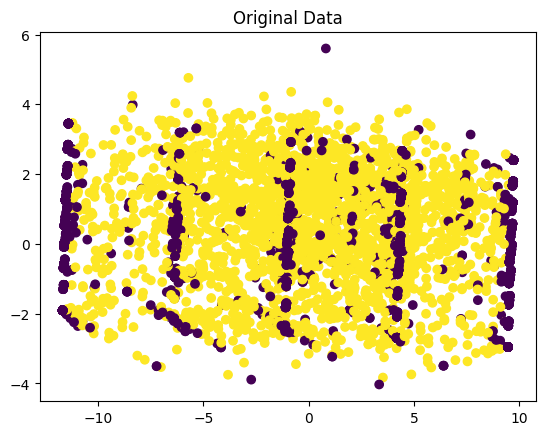

In [260]:
plt.scatter(reduced_data1[:, 0], reduced_data1[:, 1], c=labels1, cmap='viridis', label='Original')
plt.title("Original Data")

Text(0.5, 1.0, 'Transformed Data')

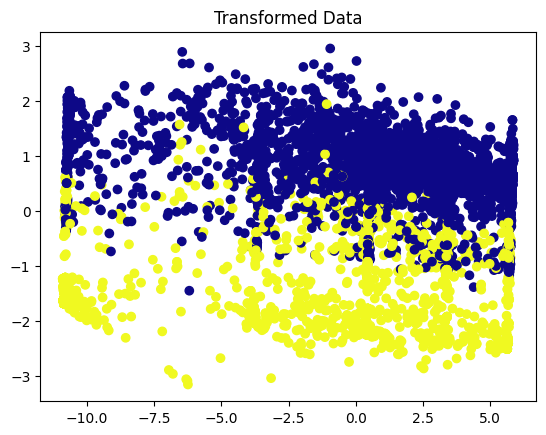

In [228]:
plt.scatter(reduced_data1_trans[:, 0], reduced_data1_trans[:, 1], c=labels1_trans, cmap='plasma', label='Transformed')
plt.title("Transformed Data")

### Apply GMM on PCA data

In [263]:
gmm1 = GaussianMixture(n_components=2, random_state=33)
labels1 = gmm1_trans.fit_predict(reduced_data1)
pca_sil_score1 = silhouette_score(reduced_data1, labels1_trans)

In [262]:
gmm1_trans = GaussianMixture(n_components=2, random_state=33)
labels1_trans = gmm1_trans.fit_predict(reduced_data1_trans)
pca_sil_score1_trans = silhouette_score(reduced_data1_trans, labels1_trans)

In [265]:
pca_sil_score1

0.4715849063397491

In [264]:
pca_sil_score1_trans

0.4762465553809292

In [229]:
# Visualize clusters
pca = PCA(n_components=2)
reduced_data2 = pca.fit_transform(data2_scaled)
reduced_data2_trans = pca.fit_transform(data2_transformed_scaled)

Text(0.5, 1.0, 'Original Data')

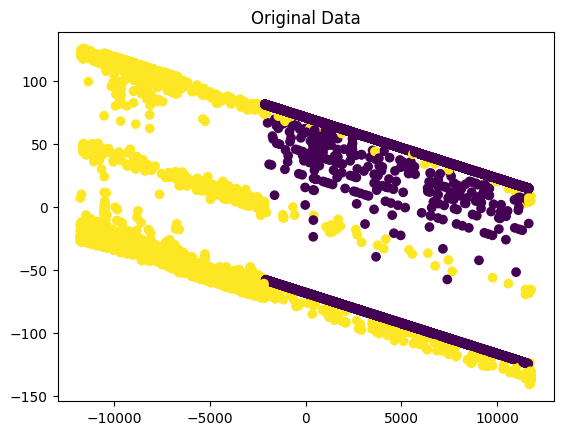

In [230]:
plt.scatter(reduced_data2[:, 0], reduced_data2[:, 1], c=labels2, cmap='viridis', label='Original')
plt.title("Original Data")

Text(0.5, 1.0, 'Transformed Data')

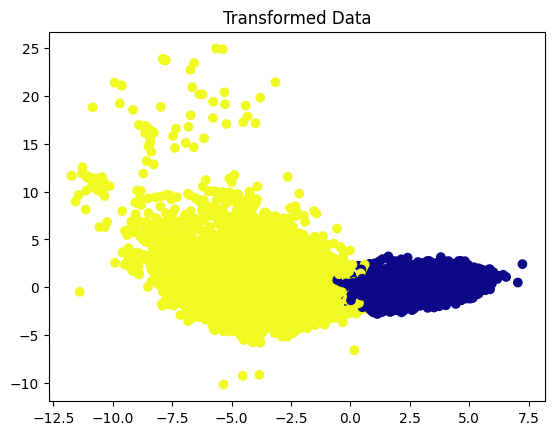

In [231]:
plt.scatter(reduced_data2_trans[:, 0], reduced_data2_trans[:, 1], c=labels2_trans, cmap='plasma', label='Transformed')
plt.title("Transformed Data")

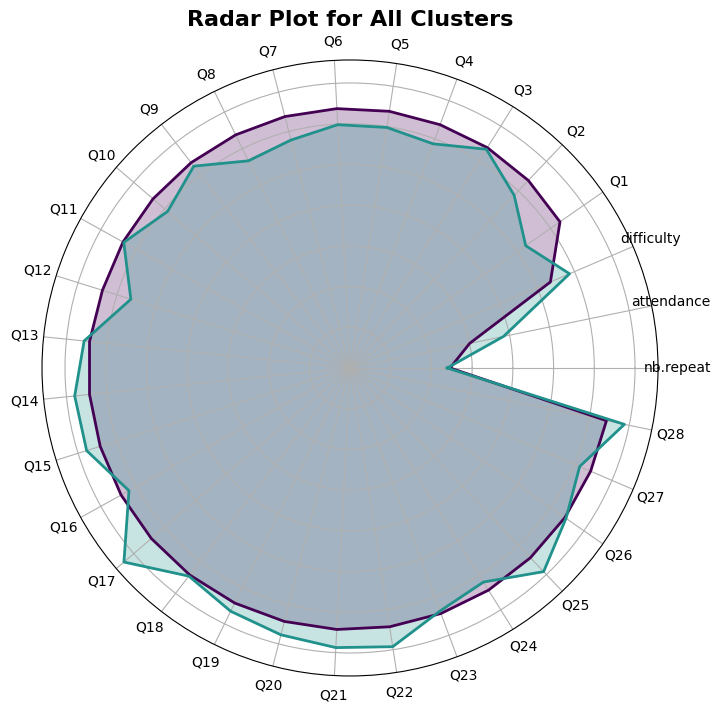

In [232]:
# Select the columns with the features you want to include in the radar plot
features = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']  # Adjust this based on your features
features = data1.columns

# Group by the cluster labels and calculate the mean for each feature
cluster_means = data1[features].groupby(labels1).mean()

# Radar plot function
def create_radar_chart(labels, values, title, color, ax):
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the circle by repeating the first value at the end
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]  # Close the circle

    # Plot the radar chart
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2)

# Create a single figure with one axis for all clusters
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the title
ax.set_title('Radar Plot for All Clusters', size=16, fontweight='bold')

# Create radar charts for each cluster
for i, cluster in enumerate(cluster_means.index):
    color = plt.cm.viridis(i / len(cluster_means.index))  # Use a different color for each cluster
    create_radar_chart(features, cluster_means.loc[cluster].values, f"Cluster {cluster}", color, ax)

# Add labels and show the plot
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, 2 * np.pi, len(features), endpoint=False))
ax.set_xticklabels(features, fontsize=10)

plt.show()

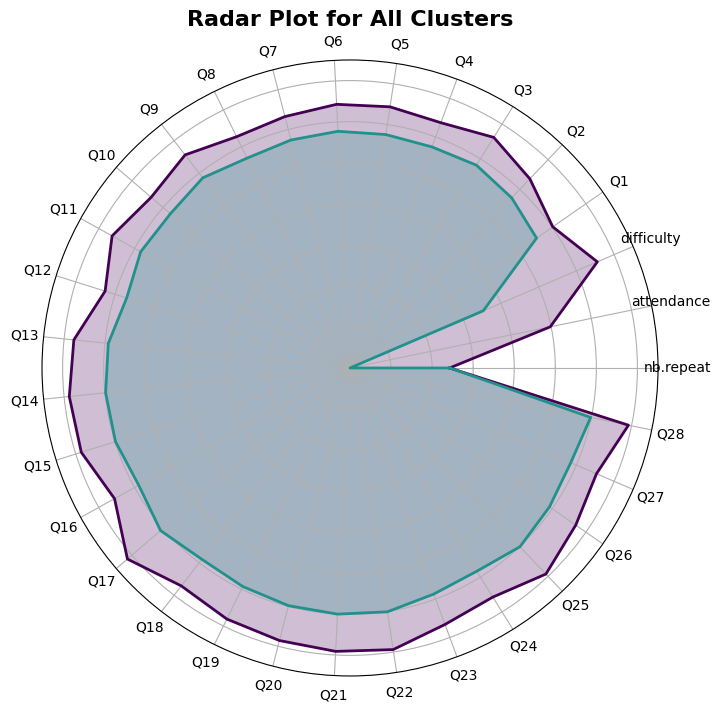

In [233]:
features = data1.columns

# Group by the cluster labels and calculate the mean for each feature
cluster_means = data1[features].groupby(labels1_trans).mean()

# Radar plot function
def create_radar_chart(labels, values, title, color, ax):
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the circle by repeating the first value at the end
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]  # Close the circle

    # Plot the radar chart
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2)

# Create a single figure with one axis for all clusters
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the title
ax.set_title('Radar Plot for All Clusters', size=16, fontweight='bold')

# Create radar charts for each cluster
for i, cluster in enumerate(cluster_means.index):
    color = plt.cm.viridis(i / len(cluster_means.index))  # Use a different color for each cluster
    create_radar_chart(features, cluster_means.loc[cluster].values, f"Cluster {cluster}", color, ax)

# Add labels and show the plot
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, 2 * np.pi, len(features), endpoint=False))
ax.set_xticklabels(features, fontsize=10)

plt.show()

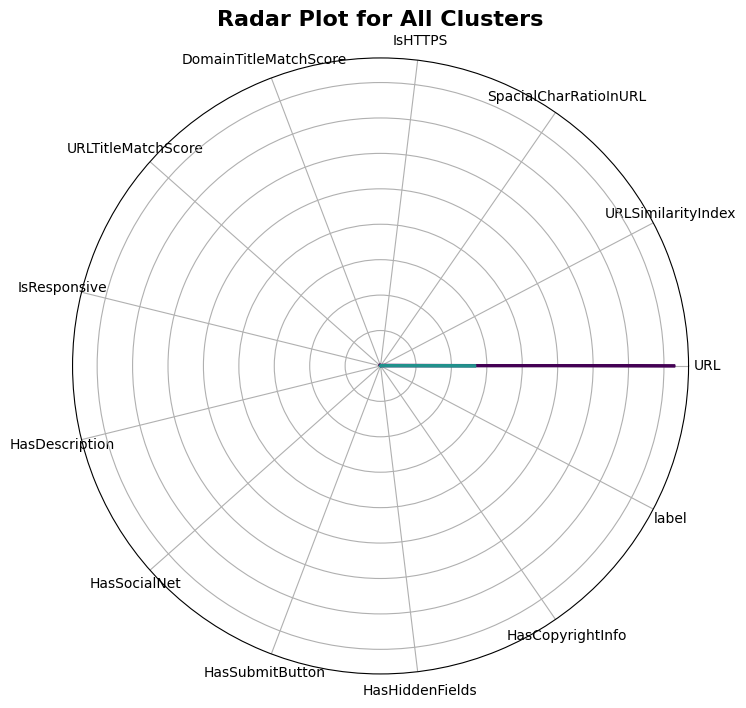

In [234]:
# Select the columns with the features you want to include in the radar plot
features = data2_subset.columns

# Group by the cluster labels and calculate the mean for each feature
cluster_means = data2_subset[features].groupby(labels2).mean()

# Radar plot function
def create_radar_chart(labels, values, title, color, ax):
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the circle by repeating the first value at the end
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]  # Close the circle

    # Plot the radar chart
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2)

# Create a single figure with one axis for all clusters
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the title
ax.set_title('Radar Plot for All Clusters', size=16, fontweight='bold')

# Create radar charts for each cluster
for i, cluster in enumerate(cluster_means.index):
    color = plt.cm.viridis(i / len(cluster_means.index))  # Use a different color for each cluster
    create_radar_chart(features, cluster_means.loc[cluster].values, f"Cluster {cluster}", color, ax)

# Add labels and show the plot
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, 2 * np.pi, len(features), endpoint=False))
ax.set_xticklabels(features, fontsize=10)

plt.show()

In [235]:
exclude_columns = ['FILENAME', 'URL', 'Domain', 'label']

# Create the 'features' list by excluding the unwanted columns
features = [col for col in data2.columns if col not in exclude_columns]

In [236]:
features = data2_subset.columns

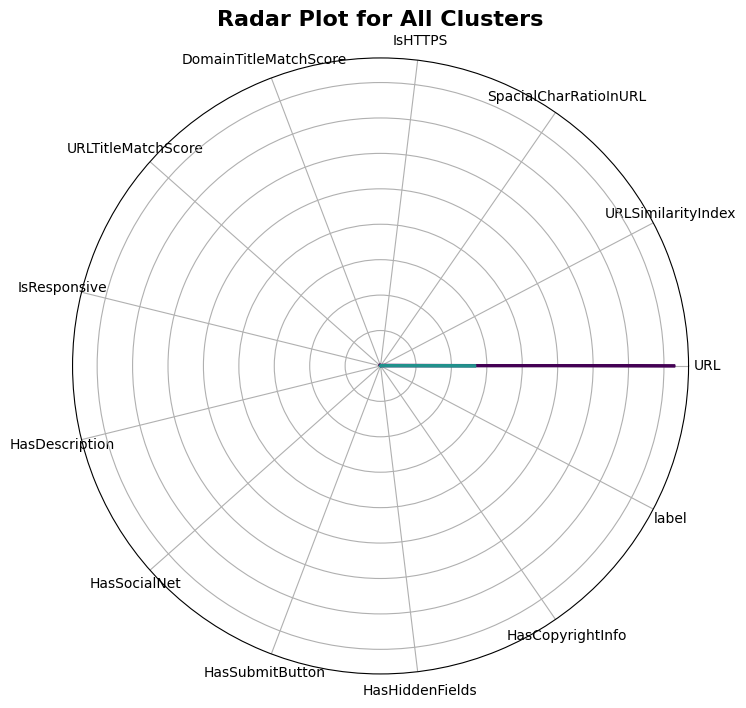

In [237]:
# Group by the cluster labels and calculate the mean for each feature
cluster_means = data2_subset[features].groupby(labels2).mean()

# Radar plot function
def create_radar_chart(labels, values, title, color, ax):
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Close the circle by repeating the first value at the end
    values = np.concatenate((values, [values[0]]))
    angles += angles[:1]  # Close the circle

    # Plot the radar chart
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2)

# Create a single figure with one axis for all clusters
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the title
ax.set_title('Radar Plot for All Clusters', size=16, fontweight='bold')

# Create radar charts for each cluster
for i, cluster in enumerate(cluster_means.index):
    color = plt.cm.viridis(i / len(cluster_means.index))  # Use a different color for each cluster
    create_radar_chart(features, cluster_means.loc[cluster].values, f"Cluster {cluster}", color, ax)

# Add labels and show the plot
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, 2 * np.pi, len(features), endpoint=False))
ax.set_xticklabels(features, fontsize=10)

plt.show()

## Min Max Transformation

In [238]:
from sklearn.preprocessing import MinMaxScaler
def apply_min_max(data):
    transformed_data = data.copy()

    # Select numeric columns only
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Apply Min-Max scaling to numeric columns
    transformed_data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

    return transformed_data

In [239]:
# Apply Box-Cox transformation (requires positive values)
data1_transformed = apply_min_max(data1)
data2_transformed = apply_min_max(data2_subset)

In [240]:
# Re-standardize
scaler = StandardScaler()
data1_transformed_scaled = scaler.fit_transform(data1_transformed)
data2_transformed_scaled = scaler.fit_transform(data2_transformed)

In [241]:
gmm1_trans = GaussianMixture(n_components=2, random_state=33)
labels1_trans = gmm1_trans.fit_predict(data1_transformed_scaled)
sil_score1_trans = silhouette_score(data1_transformed_scaled, labels1_trans)

In [242]:
gmm2_trans = GaussianMixture(n_components=2, random_state=33)
labels2_trans = gmm2_trans.fit_predict(data2_transformed_scaled)
sil_score2_trans = silhouette_score(data2_transformed_scaled, labels2_trans)

In [243]:
print(f'Silhouette Score Dataset 1 (Transformed): {sil_score1_trans}')
print(f'Silhouette Score Dataset 2 (Transformed): {sil_score2_trans}')

Silhouette Score Dataset 1 (Transformed): 0.025245004009288224
Silhouette Score Dataset 2 (Transformed): 0.43031875530879016


In [244]:
# Visualize clusters
pca = PCA(n_components=2)
reduced_data1 = pca.fit_transform(data1_scaled)
reduced_data1_trans = pca.fit_transform(data1_transformed_scaled)

Text(0.5, 1.0, 'Original Data')

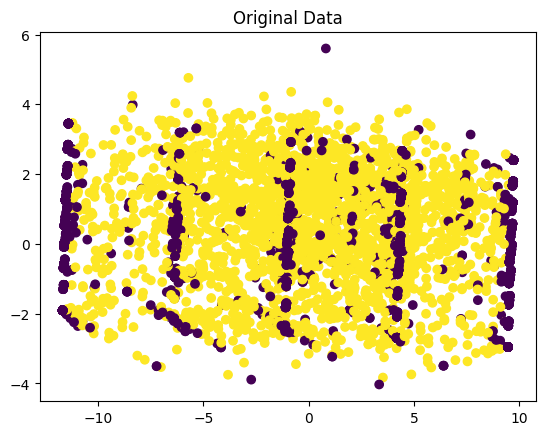

In [245]:
plt.scatter(reduced_data1[:, 0], reduced_data1[:, 1], c=labels1, cmap='viridis', label='Original')
plt.title("Original Data")

Text(0.5, 1.0, 'Transformed Data')

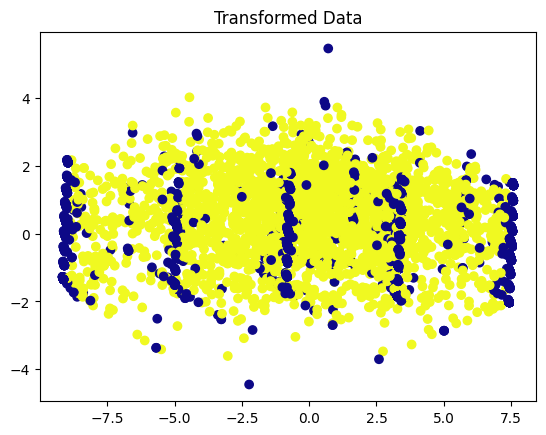

In [246]:
plt.scatter(reduced_data1_trans[:, 0], reduced_data1_trans[:, 1], c=labels1_trans, cmap='plasma', label='Transformed')
plt.title("Transformed Data")

In [247]:
# Visualize clusters
pca = PCA(n_components=2)
reduced_data2 = pca.fit_transform(data2_scaled)
reduced_data2_trans = pca.fit_transform(data2_transformed_scaled)

Text(0.5, 1.0, 'Original Data')

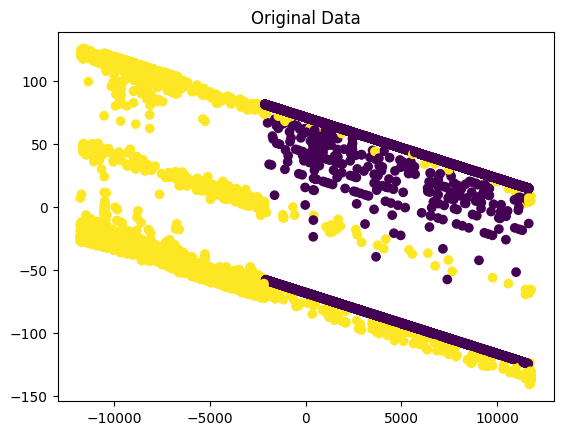

In [248]:
plt.scatter(reduced_data2[:, 0], reduced_data2[:, 1], c=labels2, cmap='viridis', label='Original')
plt.title("Original Data")

Text(0.5, 1.0, 'Transformed Data')

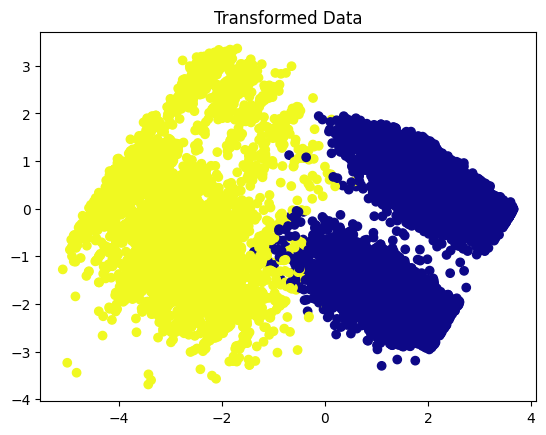

In [249]:
plt.scatter(reduced_data2_trans[:, 0], reduced_data2_trans[:, 1], c=labels2_trans, cmap='plasma', label='Transformed')
plt.title("Transformed Data")

## Logit, Reciprocal and Box-Cox Transformation (didnt work)

data had 0 vals so reciprocal broke, it had values not in 0-1 range for logit and pox-cox was converting our entire dataset2 to zeros.

In [250]:
def apply_reciprocal(data):
    transformed_data = data.copy()

    # Select numeric columns only
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

    for col in numeric_cols:
        # Ensure there are no zero values (since division by zero is undefined)
        if (data[col] == 0).any():
            raise ValueError(f"Column {col} contains zero values, which cannot be transformed using reciprocal.")

        # Apply reciprocal transformation: 1 / x
        transformed_data[col] = 1 / data[col]

    return transformed_data

In [251]:
# Apply Box-Cox transformation (requires positive values)
data1_transformed = apply_reciprocal(data1)
data2_transformed = apply_reciprocal(data2_subset)

ValueError: Column attendance contains zero values, which cannot be transformed using reciprocal.